<a href="https://colab.research.google.com/github/sinaziaee/optical_digit_recognizer/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Dowloading resources

downloading fonts and base credit cards and base ID cards images
and saving them inside their folders

In [2]:
%matplotlib inline
from PIL import Image, ImageDraw, ImageFont
import cv2 as cv
import matplotlib.pyplot as plt
from glob import glob
import time
import os
import random
import math
import numpy as np
import pandas as pd
import pathlib
current_path = pathlib.Path().resolve()
print("current_path:", current_path)

font_arial_url = 'https://github.com/sinaziaee/optical_digit_recognizer/raw/main/fonts/arial.ttf'
font_ocr_url = 'https://github.com/sinaziaee/optical_digit_recognizer/raw/main/fonts/ocr_a.ttf'
font_yekan_url = 'https://github.com/sinaziaee/optical_digit_recognizer/raw/main/fonts/yekan.ttf'
font_nazanin_url = 'https://github.com/sinaziaee/optical_digit_recognizer/raw/main/fonts/nazanin.ttf'
bank_base_url = 'https://github.com/sinaziaee/optical_digit_recognizer/raw/main/bank_background_images'
id_base_url = 'https://github.com/sinaziaee/optical_digit_recognizer/raw/main/id_background_images/'

!wget -P /content/fonts $font_arial_url -N -q
!wget -P /content/fonts $font_ocr_url -N -q
!wget -P /content/fonts $font_yekan_url -N -q
!wget -P /content/fonts $font_nazanin_url -N -q

for i in range(1, 34):
  img_path = f'{bank_base_url}/{i}.jpg'
  !wget -P /content/bank $img_path -N -q

for i in range(1, 3):
  img_path = f'{id_base_url}/id{i}.jpg'
  !wget -P /content/id $img_path -N -q

current_path: /content


In [28]:
# path variables to use in code
bank_bg_path = 'bank_bg_images'
bank_bg_base_path = f'{current_path}/{bank_bg_path}'
font_base_path = f'{current_path}/fonts/'

files = []
# looking for bank background images in their folders and adding their addres to a list
for f in glob(f'{current_path}/bank/*.jpg'):
  files.append(f)

In [5]:
# path variables to use in code
id_bg_base_path = f'{current_path}/id_bg_images'
id_base_path = f'{current_path}/id_images'
bank_base_path = f'{current_path}/bank_images/' 
drive_path = 'project_ocr'


# creating folders if they don't exist
if not os.path.isdir(f'/content/drive/MyDrive/{drive_path}/'):
  os.mkdir(f'/content/drive/MyDrive/{drive_path}/')

if not os.path.isdir(f'/content/drive/MyDrive/{drive_path}/bank/'):
  os.mkdir(f'/content/drive/MyDrive/{drive_path}/bank/')

if not os.path.isdir(f'/content/drive/MyDrive/{drive_path}/id/'):
  os.mkdir(f'/content/drive/MyDrive/{drive_path}/id/')

if not os.path.isdir(f'{bank_bg_base_path}/'):
  os.mkdir(f'{bank_bg_base_path}/')

if not os.path.isdir(id_bg_base_path):
  os.mkdir(id_bg_base_path)

if not os.path.isdir(id_base_path):
  os.mkdir(id_base_path)

if not os.path.isdir(bank_base_path):
  os.mkdir(bank_base_path)

# cropping images with the help of opencv and cutting
for i, file in enumerate(files):
  img = cv.imread(files[i])
  h, w, c = img.shape
  new = cv.cvtColor(img, cv.COLOR_BGR2RGB)
  if w > 200:
    h_sec = int(h/7)
    w_sec = int(w/6)
    new = img[3*h_sec:6*h_sec, w_sec:5*w_sec,]
  else:
    h_sec = int(h/14)
    w_sec = int(w/12)
    new = img[3*h_sec:12*h_sec, w_sec:12*w_sec,]
  try:
    cv.imwrite(f'{bank_bg_base_path}/{i}.jpg', new)
  except Exception as e:
    pass
print(len(files))

33


In [6]:
# english fonts for credit card 
fonts = [f'{font_base_path}/arial.ttf', f'{font_base_path}/ocr_a.ttf']
# creating random 16 digit numbers with spaces between them
def create_random_credit_number():
  num = random.randint(pow(10,15), (pow(10, 16)-1))
  num = str(num)
  new_num = ''
  for i in range(16):
    if i % 4 == 0:
      new_num += ' '
    new_num += num[i]
  return num, new_num


files = []
# iterating on cropped background images
for f in glob(f'{bank_bg_base_path}/*.jpg'):
  files.append(f)

m = 0
labels = []
images = []
# for loop on background images
for i in range(len(files)):
  arr = cv.imread(files[i])
  h, w, c = arr.shape
  # for loop on fonts
  for j in range(len(fonts)):
    if w > 200:
      center = int(h/2) - 13
      fnt = ImageFont.truetype(fonts[j], 26)
    else:
      center = int(h/2) - 6
      fnt = ImageFont.truetype(fonts[j], 12)
    # for loop on 10 random numbers
    for k in range(10):
      img = Image.open(files[i])
      num, str_num = create_random_credit_number()
      d = ImageDraw.Draw(img)
      # writing with black color on cards
      d.text((10, center), str_num, font=fnt, fill=(0, 0, 0))
      out_img_path = f'{bank_base_path}{m}.jpg'
      m += 1
      img.save(out_img_path)
      img.save(f'/content/drive/MyDrive/{drive_path}/bank/{m}.jpg')
      d2 = ImageDraw.Draw(img)
      labels.append(num)
      images.append(cv.imread(out_img_path))
      # writing with white color on cards
      d2.text((10, center), str_num, font=fnt, fill=(255, 255, 255))
      out_img_path = f'{bank_base_path}{m}.jpg'
      m += 1
      labels.append(num)
      img.save(out_img_path)
      img.save(f'/content/drive/MyDrive/{drive_path}/bank/{m}.jpg')
      images.append(cv.imread(out_img_path))

labels = np.array(labels)
images = np.array(images)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [7]:
# changing numpy array to dataframw and saving csv data
df = pd.DataFrame(labels)
df.to_csv('bank_labels.csv')
df.to_csv('/content/drive/MyDrive/project_ocr/bank_labels.csv')
print(df.shape)

(1320, 1)


(720, 1280, 3)
(557, 800, 3)


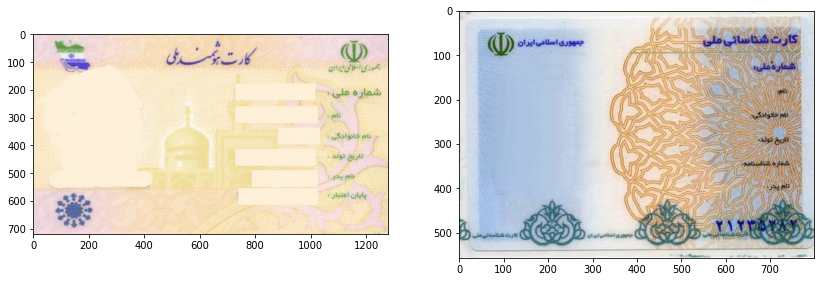

In [22]:
# loading ID cards
id1 = cv.imread(f'{current_path}/id/id1.jpg')
id2 = cv.imread(f'{current_path}/id/id2.jpg')
print(id1.shape)
print(id2.shape)
plt.figure(figsize=(14, 5))
plt.subplot(121)
plt.imshow(id1)
plt.subplot(122)
plt.imshow(id2)
plt.show()

In [23]:
# creating background cropped ID images 
arr1 = id1[160:250, 750:1050]
cv.imwrite(f'{id_bg_base_path}/id_bg1.jpg', arr1)
arr2 = id2[300:390, 270:620]
cv.imwrite(f'{id_bg_base_path}/id_bg2.jpg', arr2)
arr3 = id1[220:350, 350:700]
cv.imwrite(f'{id_bg_base_path}/id_bg3.jpg', arr3)
arr4 = id1[120:250, 350:700]
cv.imwrite(f'{id_bg_base_path}/id_bg4.jpg', arr4)
arr5 = id1[340:470, 400:700]
cv.imwrite(f'{id_bg_base_path}/id_bg5.jpg', arr5)

True

In [25]:
# creating a 10 digit random number 
def create_random_id_number():
  num = random.randint(pow(10,9), (pow(10, 10)-1))
  new_num = str(num)
  return num, new_num
# changing english digit to persian digit
def to_persian(n):
  if n == 0:
    return '۰'
  elif n == 1:
    return '۱'
  elif n == 2:
    return '۲'
  elif n == 3:
    return '۳'
  elif n == 4:
    return '۴'
  elif n == 5:
    return '۵'
  elif n == 6:
    return '۶'
  elif n == 7:
    return '۷'
  elif n == 8:
    return '۸'
  elif n == 9:
    return '۹'
# converting number from english to persian
def num_to_persian(num):
  copy = num
  string = ''
  while copy !=0:
    r = copy % 10
    copy = int(copy / 10)
    string = to_persian(r) + string
  return string

In [27]:
files = []
for file in glob(f'{id_bg_base_path}/id_bg*.jpg'):
  files.append(file)

fonts = ['fonts/yekan.ttf', 'fonts/nazanin.ttf']
id_labels = []
id_images = []
m = 0
# for loop on 1000 different random numbers
for i in range(1000):
  num, str_num = create_random_id_number()
  str_num = num_to_persian(num)
  # for loop on background id images
  for j in range(len(files)):
    h, w, c = cv.imread(files[j]).shape
    center = int(h / 2) - 15
    # for loop on fonts
    for k in range(len(fonts)):
      img = Image.open(files[j])
      fnt = ImageFont.truetype(fonts[k], 30)
      d = ImageDraw.Draw(img)
      d.text((10, center), str_num, font=fnt, fill=(0, 0, 0))
      out_img_path = f'{id_base_path}/{i}.jpg'
      # saving images
      img.save(out_img_path)
      # saving to google drive
      img.save(f'/content/drive/MyDrive/{drive_path}/id/{m}.jpg')
      arr = cv.imread(out_img_path)
      arr = cv.cvtColor(arr, cv.COLOR_BGR2RGB)
      m += 1
      id_labels.append(num)
      id_images.append(arr)

id_labels = np.array(id_labels)
id_images = np.array(id_images)
df = pd.DataFrame(id_labels)
df.to_csv('id_labels.csv')
df.to_csv('/content/drive/MyDrive/project_ocr/id_labels.csv')

Resources:

[write on images](https://www.geeksforgeeks.org/adding-text-on-image-using-python-pil/)